# Student Admission Project

**We need to predict the chance of admission based on students various scores.**

**Features of independent variables**

 - GRE Score
 - TOEFL Score
 - University Rating
 - SOP
 - LOR
 - CGPA
 - Research

**Label/Target**

 - Chance of Admit

In [1]:
# let's start with importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read csv file and convert into dataframe

data = pd.read_csv('Student Admission.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [3]:
data.shape

(500, 9)

In [4]:
# Understand data at high level.Check the statistics of data set

data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
# Checking for null values

data.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [6]:
# Filling null values

data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean())

data['GRE Score'] = data['GRE Score'].fillna(data['GRE Score'].mean())

data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])

In [7]:
# Verify 
data.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Now the data looks good and there are no missing values. Also, the first column is just serial numbers, so we don't need that column.Let's dropn it from data and make it clean.

In [8]:
# Dropping unwanted column

data.drop(columns = ['Serial No.'], inplace = True)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


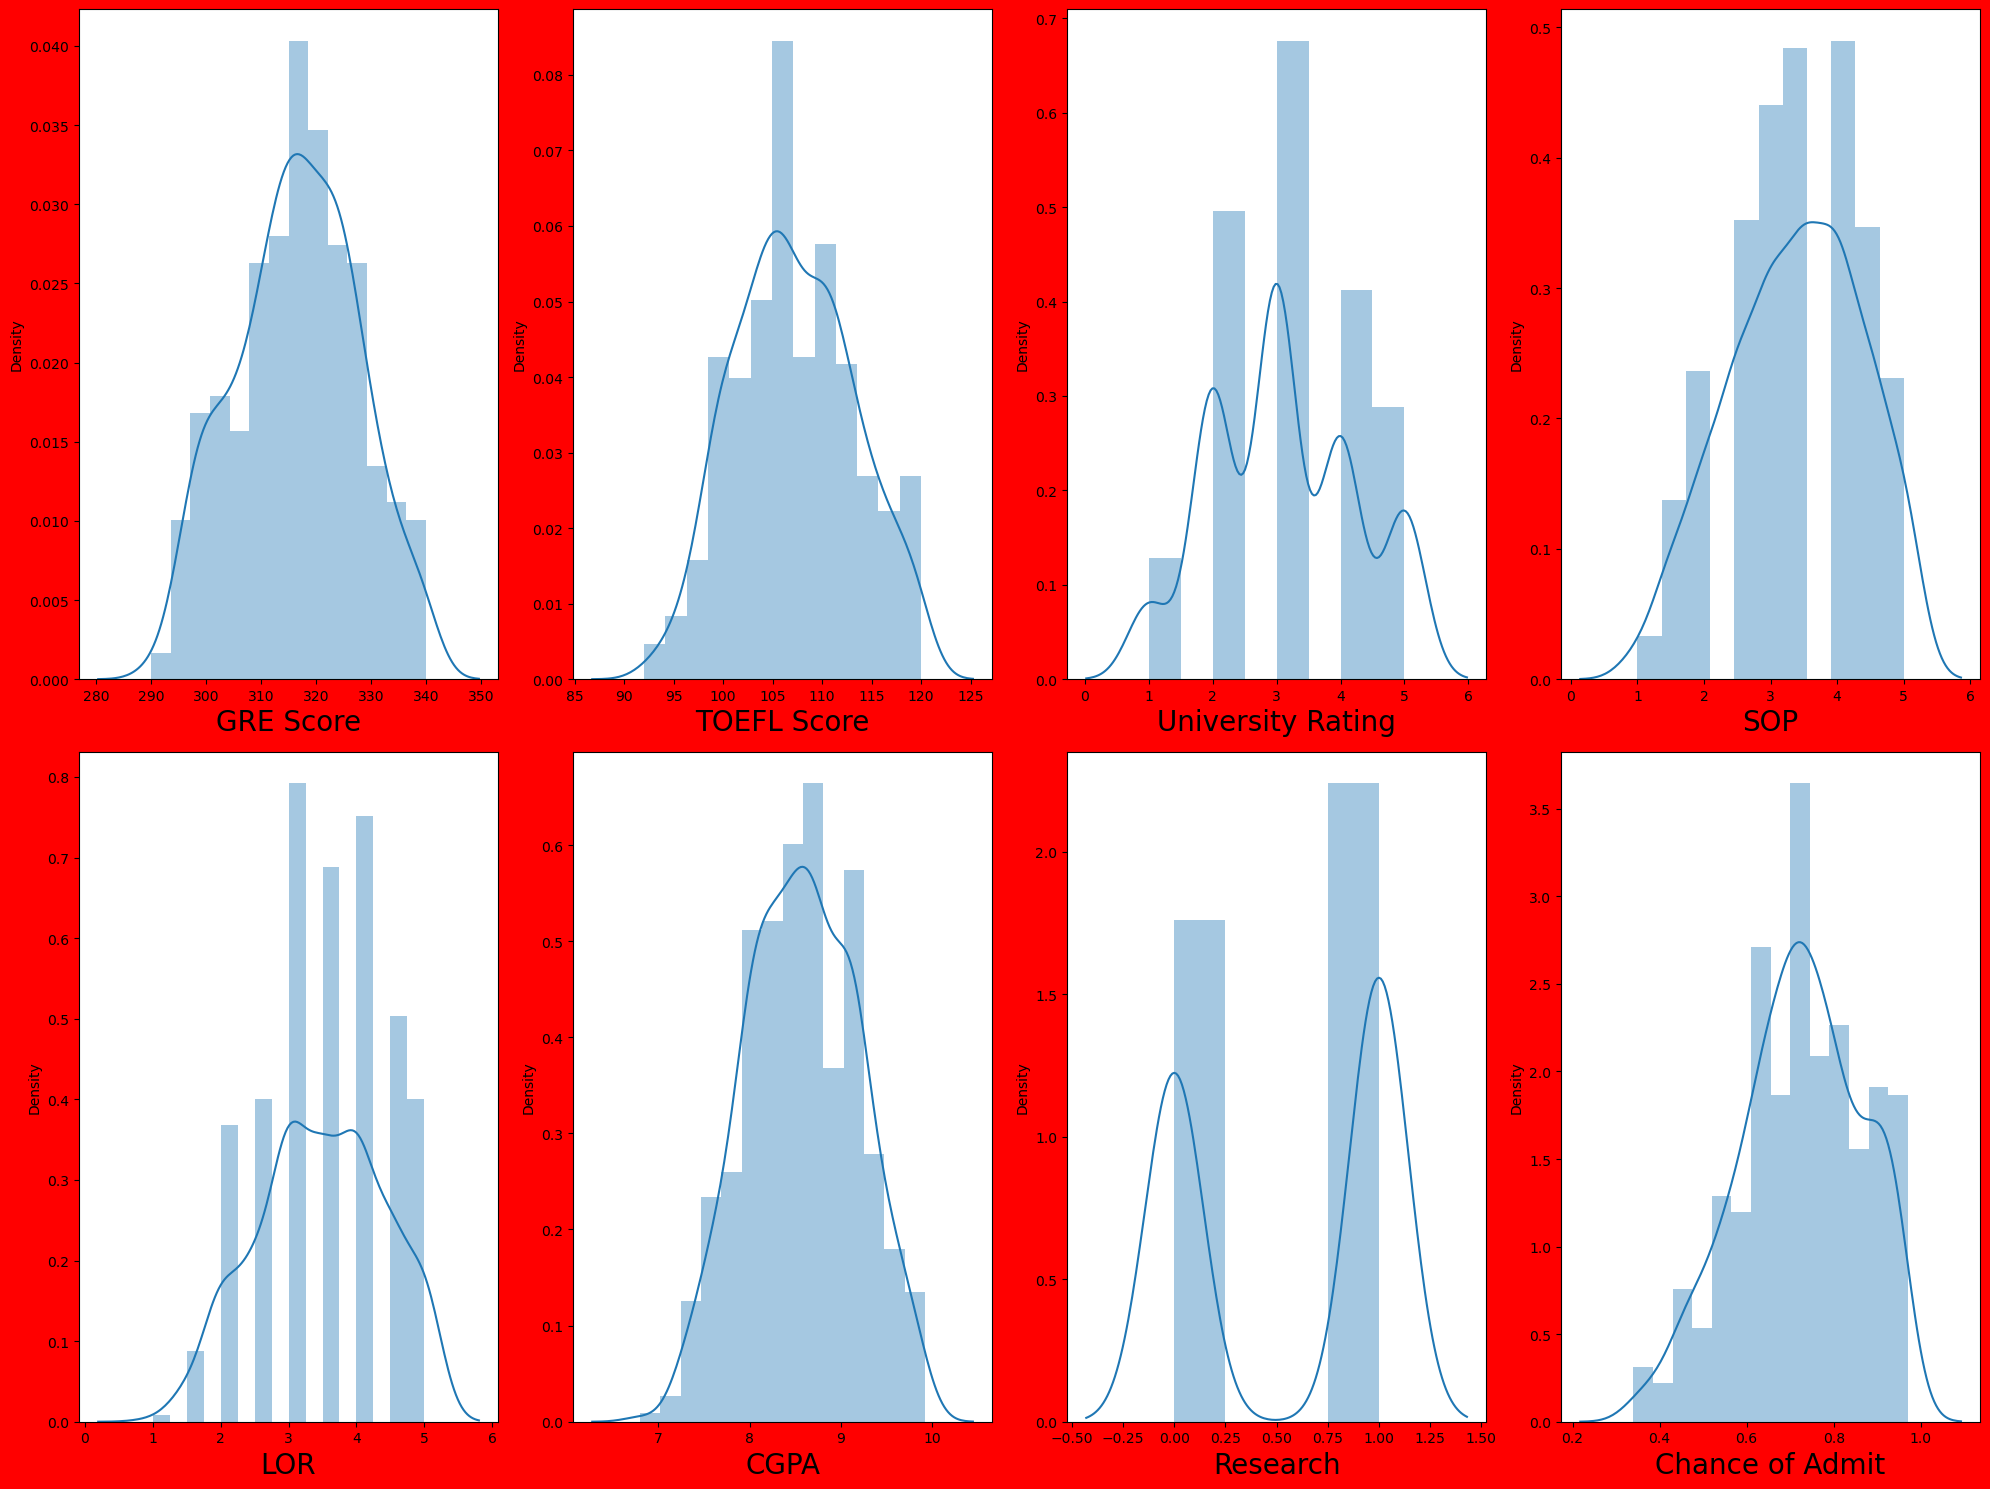

In [9]:
# Let's see how data is distributed for every column

plt.figure(figsize = (20,15), facecolor = 'red')
plotnumber = 1

for column in data:
    if plotnumber <= 8:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 20)
        
    plotnumber += 1
plt.tight_layout()       # same as plt.show()

The data distribution looks decent enough and there doesn't seem to be any skewness.Great let's go ahead!

Let's observe the relationship between independent variables and dependent variables.

In [10]:
# Divide data set into features and label

y = data['Chance of Admit']
X = data.drop(columns = ['Chance of Admit'])

In [11]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [12]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1
496,337.000000,117.0,5.0,5.0,5.0,9.87,1
497,330.000000,120.0,5.0,4.5,5.0,9.56,1
498,312.000000,103.0,4.0,4.0,5.0,8.43,0


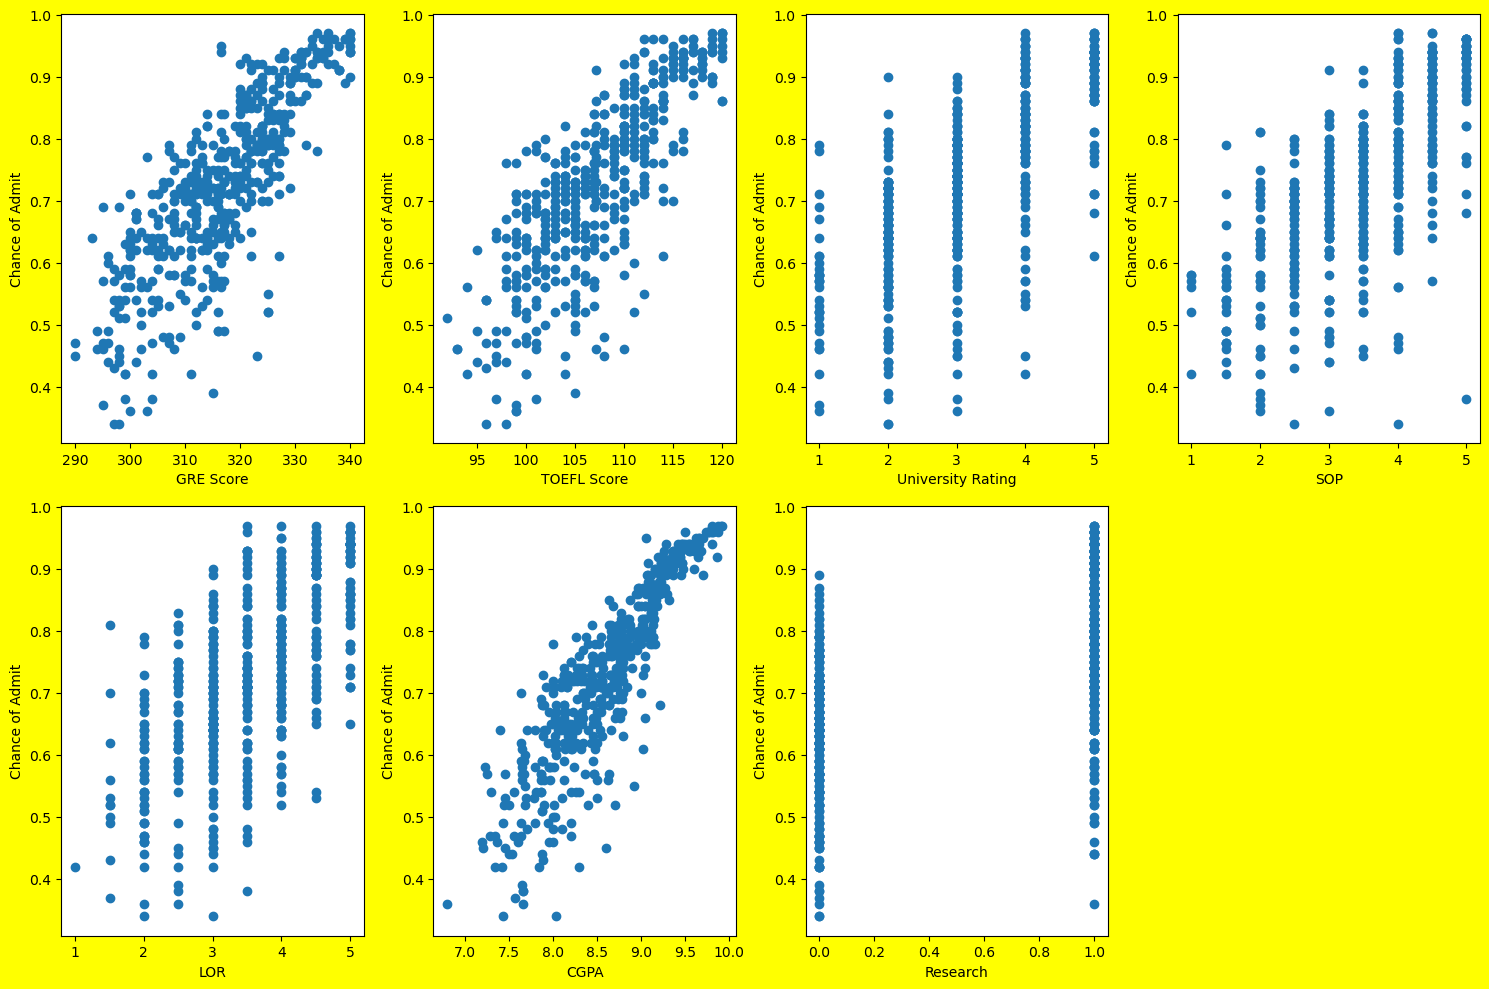

In [13]:
# Relationship b/w feature and label

plt.figure(figsize = (15,10), facecolor = 'yellow')
plotnumber = 1

for column in X:
    if plotnumber <= 8:
        ax = plt.subplot(2,4,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column, fontsize = 10)
        plt.ylabel('Chance of Admit', fontsize = 10)
        
    plotnumber += 1
plt.tight_layout()

Great, the relationship between the dependent(label) and independent variables(features) look fairly linear.Thus, our linear assumption is satisfied.

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
# Data Scaling.

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# Split data into train and test. Model will be built on training data and tested on test data.

x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size = 0.25, random_state = 348)
y_train.head()

459    0.89
174    0.87
399    0.95
374    0.39
355    0.73
Name: Chance of Admit, dtype: float64

### Model Instantiating and training

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lr = LinearRegression()

lr.fit(x_train,y_train)    # learning from trained data/ Training the model

LinearRegression()

Model is built and now ready for prediction

### Predict the chance of admission given features

In [20]:
test_pred = lr.predict(x_test)
test_pred

array([0.8207641 , 0.94873455, 0.91113259, 0.61044355, 0.66137595,
       0.60352359, 0.83223756, 0.63090419, 0.78083483, 0.76003632,
       0.61343331, 0.5171975 , 0.84481161, 0.47026296, 0.9080331 ,
       0.62012908, 0.73074873, 0.63424789, 0.82329681, 0.57632803,
       0.80849253, 0.75415425, 0.65115419, 0.53199278, 0.55202691,
       0.49318412, 0.8954953 , 0.77677743, 0.72036651, 0.42326242,
       0.82315696, 0.79339286, 0.62530834, 0.67328918, 0.77417537,
       0.63745613, 0.80739236, 0.78788545, 0.58911428, 0.66156995,
       0.73593055, 0.59762008, 0.86327735, 0.94441147, 0.98184889,
       0.51308745, 0.77626965, 0.92424654, 0.63718128, 0.96940982,
       0.65572611, 0.63867889, 0.81411786, 0.73643354, 0.68692311,
       0.55261258, 0.43652872, 0.64497596, 0.68382796, 0.68701788,
       0.86409285, 0.67198884, 0.78792379, 0.65534022, 0.95792159,
       0.61596565, 0.72449619, 0.53769901, 0.59184804, 0.78917924,
       0.74441132, 0.6447335 , 0.99270469, 0.66219368, 0.65200

In [21]:
# Adjusted R2 score (given training data to learn, now we  will check how well model is learned)

lr.score(x_train,y_train)    # lr.score is nothing but adjusted r2 score

0.82855357382842

Let's check how well model fits the test data.

In [22]:
lr.score(x_test, y_test)  # how well model will predict the data

0.7928310580010802

### We almost achieve 80% score which is good.

In [23]:
import joblib

In [24]:
# saving the model to the local file system

joblib.dump(lr,'regression_model.pkl')     

['regression_model.pkl']